# Generación de Grafos
William Cabrera, Paola Cortés, Simón Vélez
Universidad del Rosario 2024

In [2]:
# Librerías

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
# Leer el archivo CSV con la base da datos y convertirlo a un dataframe de Pandas

df = pd.read_csv(r'bases_de_datos/tcc_ceds_music14variado.csv')
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,5135,abba,love isn't easy (but it sure is hard enough),1973,pop,remember time sweet sweet talk hear look make ...,119,0.000516,0.000516,0.214905,...,0.000516,0.000516,0.728149,0.626695,0.091967,0.000000,0.964963,0.590578,romantic,0.671429
1,19396,taylor swift,i did something bad,2017,pop,trust narcissist play like violin look ohsoeas...,114,0.000548,0.000548,0.091960,...,0.000548,0.375155,0.686992,0.756378,0.068172,0.000021,0.289984,0.602590,feelings,0.042857
2,20382,johnny cash,the loving gift,1952,country,give blanket cold give song learn sing show be...,53,0.029831,0.073515,0.680088,...,0.001316,0.001316,0.476876,0.560085,0.884538,0.000197,0.347692,0.191166,world/life,0.971429
3,20569,marty robbins,bouquet of roses,1957,country,send bouquet roses time break heart door close...,42,0.001645,0.001645,0.169887,...,0.574922,0.001645,0.623091,0.693306,0.684739,0.000000,0.693941,0.343323,sadness,0.900000
4,40136,b.b. king,boogie woogie woman,1957,blues,boogiewoogie woman boogiewoogie time boogiewoo...,51,0.001645,0.001645,0.001645,...,0.001645,0.001645,0.407560,0.779427,0.520080,0.000000,0.540396,0.943942,night/time,0.900000
5,42589,jethro tull,living in the past,1969,blues,smile walk mile drink water know walk shout di...,41,0.001548,0.236585,0.358175,...,0.096631,0.001548,0.676162,0.631567,0.216867,0.000019,0.970115,0.488473,world/life,0.728571
6,54538,thelonious monk,let's call this,1954,jazz,hello check leader street dreamer best watch b...,118,0.024358,0.219083,0.000684,...,0.163883,0.000684,0.589516,0.606902,0.819277,0.000000,0.486810,0.332311,obscene,0.942857
7,63628,wailing souls,pack up,1973,reggae,punchdrunk morning coffee toast turn cold oran...,159,0.000543,0.355500,0.000543,...,0.000543,0.000543,0.672912,0.645027,0.027710,0.008978,0.771228,0.474458,violence,0.671429
8,66373,capleton,who i am,1999,reggae,somebody souls expose house blue real emperor ...,170,0.000619,0.438298,0.114718,...,0.000619,0.043003,0.589516,0.768736,0.078312,0.000000,0.892828,0.722714,violence,0.300000
9,71897,black sabbath,children of the grave,1971,rock,revolution mind children start march world liv...,57,0.000993,0.270720,0.394567,...,0.000993,0.000993,0.277591,0.557111,0.080521,0.133603,0.354905,0.650640,world/life,0.700000


### Grafo que relaciona géneros

Estado: Creando las aristas
Estado: Dibujando Aristas
Estado: Mostrando


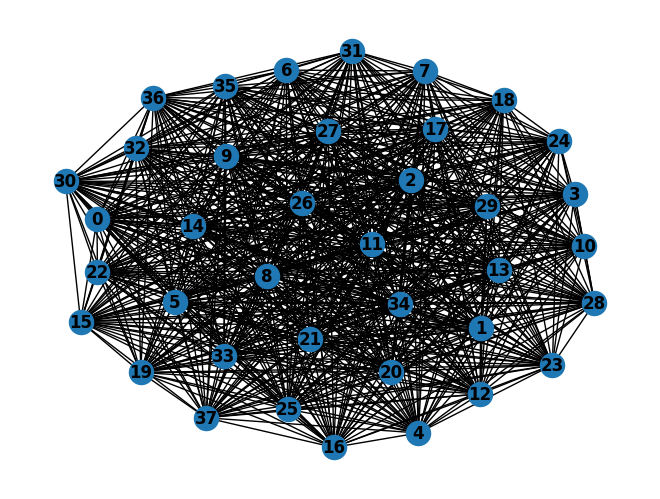

Estado: Terminado


In [3]:
# Extraer columnas relevantes
nom = df[['track_name', 'genre']].values.tolist()
top = df[['track_name', 'topic']].values.tolist()

# Crear las listas de las relaciones
relacion1 = [[i[0], i[1]] for i in nom]
relacion2 = [[i[0], i[1]] for i in top]

# Crear el grafo
gm = nx.Graph()

# Agregar nodos al grafo basados en el título de las canciones
for i in range(len(nom)):
    gm.add_node(i, label=nom[i][0])

# Diccionario para agrupar canciones por género
genre_dict = {}

for i, track in enumerate(nom):
    track_name, genre = track
    if genre not in genre_dict:
        genre_dict[genre] = []
    genre_dict[genre].append(i)

# Agregar aristas solo entre tracks del mismo género
print("Estado: Creando las aristas")
for genre, tracks in genre_dict.items():
    for i in range(len(tracks)):
        for j in range(i + 1, len(tracks)):  # Para evitar duplicación de aristas
            gm.add_edge(tracks[i], tracks[j])

# Dibujar un grafo bien bonito
pos = nx.spring_layout(gm)
print("Estado: Dibujando Aristas")
nx.draw(gm, pos, with_labels=True, font_weight='bold')
print("Estado: Mostrando")
plt.show()
print("Estado: Terminado")

### Grafo que relacionan palabras en las líricas (dos canciones están conectadas si usan la misma palabra)

Estado: Creando las aristas
Estado: Dibujando Aristas
Estado: Mostrando


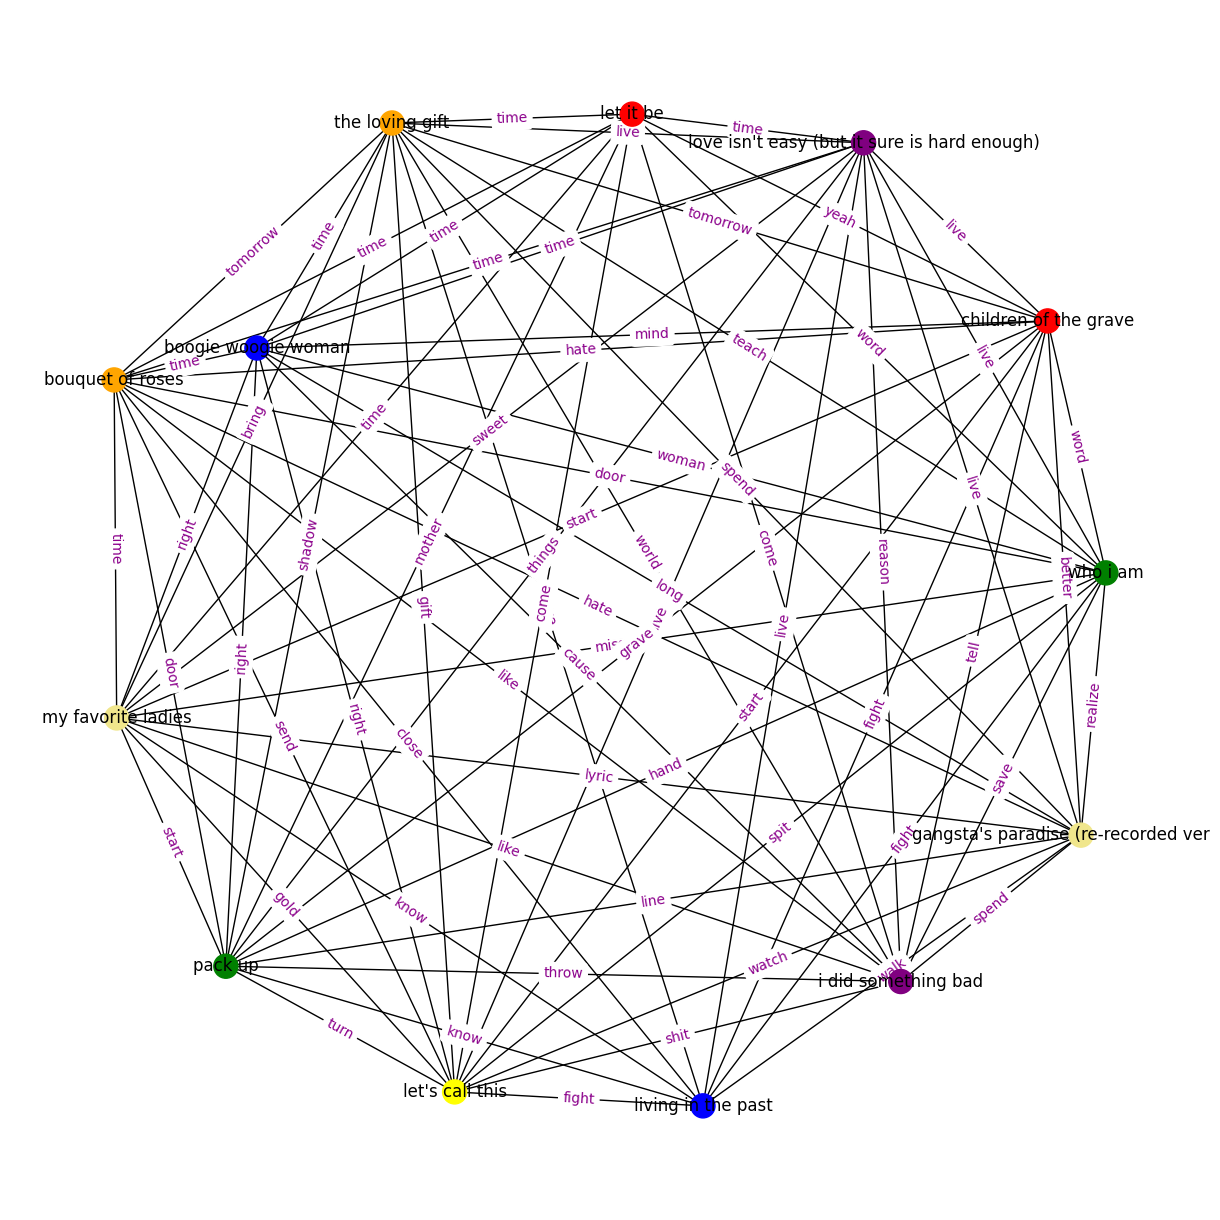

Estado: Terminado


In [ ]:
# Extraer columnas relevantes y limpiar la información
nombre = df[['track_name']].values.tolist()
lyrics = df[['lyrics']].values.tolist()
genre = df[['genre']].values.tolist()
lyrics = [lyric[0].split(" ") for lyric in lyrics] # Separar un string con todos los lyrics en una lista de palabras
lyrics = [list(set(lyric)) for lyric in lyrics] # Eliminar palabras duplicadas

# Crear el grafo
gm = nx.Graph()

# Agregar nodos al grafo basados en el título de las canciones
for i in range(len(nombre)):
    gm.add_node(i, label=nombre[i], genre= genre[i][0])

# Crear un diccionario de etiquetas de nodos para usarlo al dibujar el grafo
node_labels = {i: nombre[i][0] for i in range(len(nombre))}

# Definir los colores de cada género
color_map = {
    'pop': 'purple',
    'blues': 'blue',
    'jazz': 'yellow',
    'country': 'orange',
    'reggae' : 'green',
    'rock' : 'red',
    'hip hop' : 'khaki'
}

# Diccionario para etiquetar aristas con las palabras que conectan las canciones
edge_labels = {}

# Diccionario para agrupar canciones por palabras
palabras_dict = {}

# Llenar el diccionario con palabras como claves y listas de canciones como valores
for i, lyric in enumerate(lyrics):
    for palabra in lyric:
        if palabra not in palabras_dict:
            palabras_dict[palabra] = []
        palabras_dict[palabra].append(i)

# Agregar aristas entre canciones que tienen palabras en común
print("Estado: Creando las aristas")
for palabra, canciones in palabras_dict.items():
    for i in range(len(canciones)):
        for j in range(i + 1, len(canciones)):  # Para evitar duplicación de aristas
            gm.add_edge(canciones[i], canciones[j])
            edge_labels[(canciones[i], canciones[j])] = palabra # Guardar la palabra asociada con cada arista

# Ajustar el tamaño de la figura para que no quede muy apretada
plt.figure(figsize=(12, 12))

# Obtener los colores de cada nodo basados en el género
node_colors = [color_map[gm.nodes[i]['genre']] for i in range(len(nombre))]

# Dibujar el grafo bien bonito 
pos = nx.spring_layout(gm, k = 20) # k controla la distancia entre nodos
print("Estado: Dibujando Aristas")
nx.draw(gm, pos, labels=node_labels, with_labels=True, node_color=node_colors) # Dibujar los vértices con el nombre de la canción como etiqueta
nx.draw_networkx_edge_labels(gm, pos, edge_labels=edge_labels, font_color='darkmagenta') # Etiquetar las aristas con la palabra que relaciona ambas canciones
print("Estado: Mostrando")
plt.show()
print("Estado: Terminado")